In [1]:
import pandas as pd
import seaborn as seaborn
import numpy as np
import matplotlib.pyplot as matplot
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [2]:
# Load the dataset
apartment_rent = pd.read_csv("apartments_for_rent_classified_10K.csv",  sep=';', encoding='cp1252')

In [3]:
apartment_rent.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [4]:
# Handle missing values
apartment_rent = apartment_rent.fillna(0)

In [5]:
apartment_rent.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",0,0.0,0.0,USD,No,Thumbnail,...,$790,Monthly,101,0,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",0,0.0,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",0,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,0,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",0,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",0,0.0,0.0,USD,No,Thumbnail,...,$880,Monthly,125,0,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [6]:
# Select relevant features for clustering
features = ["bathrooms", "bedrooms", "price", "square_feet", "latitude", "longitude"]
X = apartment_rent[features]

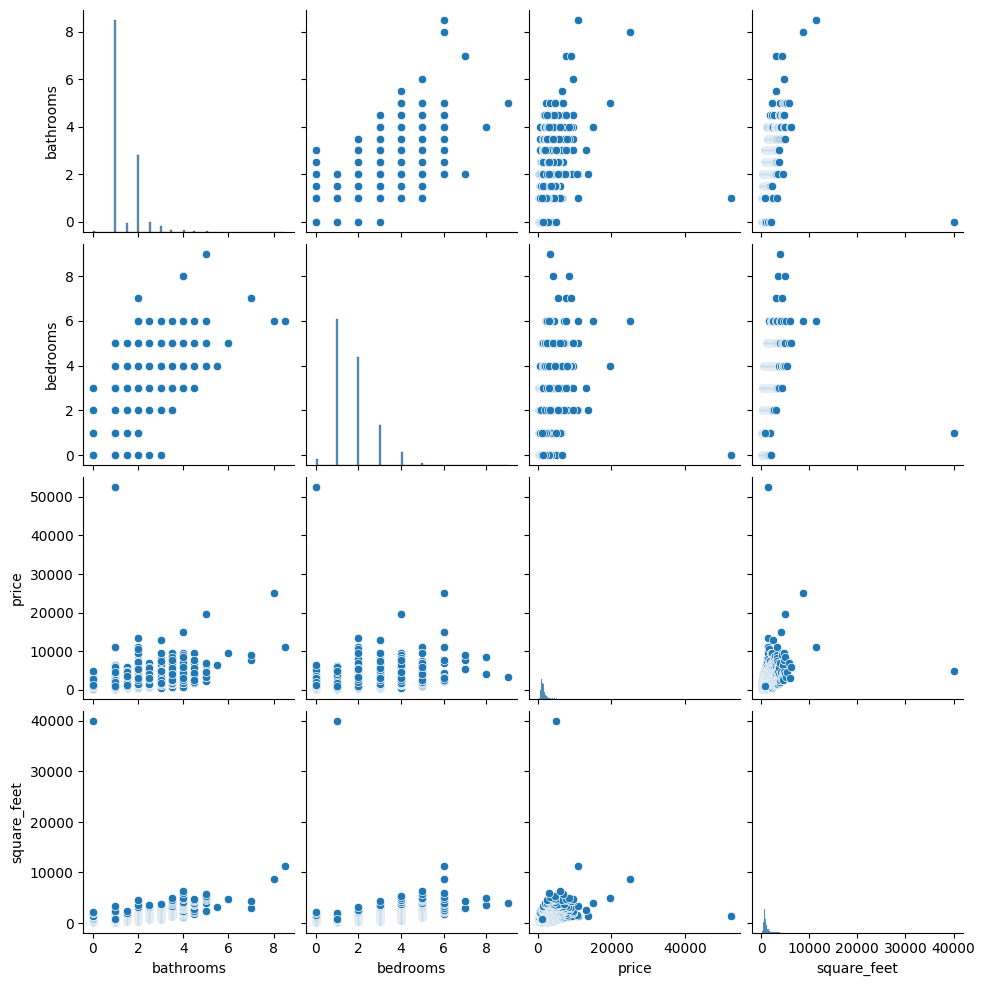

In [7]:
# EDA - Pairwise scatter plots
seaborn.pairplot(apartment_rent, vars=["bathrooms", "bedrooms", "price", "square_feet"])

<Axes: >

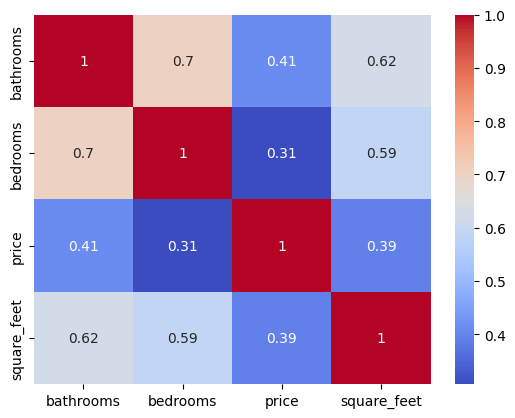

In [8]:
# EDA - Correlation heatmap
corr_matrix = apartment_rent[["bathrooms", "bedrooms", "price", "square_feet"]].corr()
seaborn.heatmap(corr_matrix, annot=True, cmap="coolwarm")

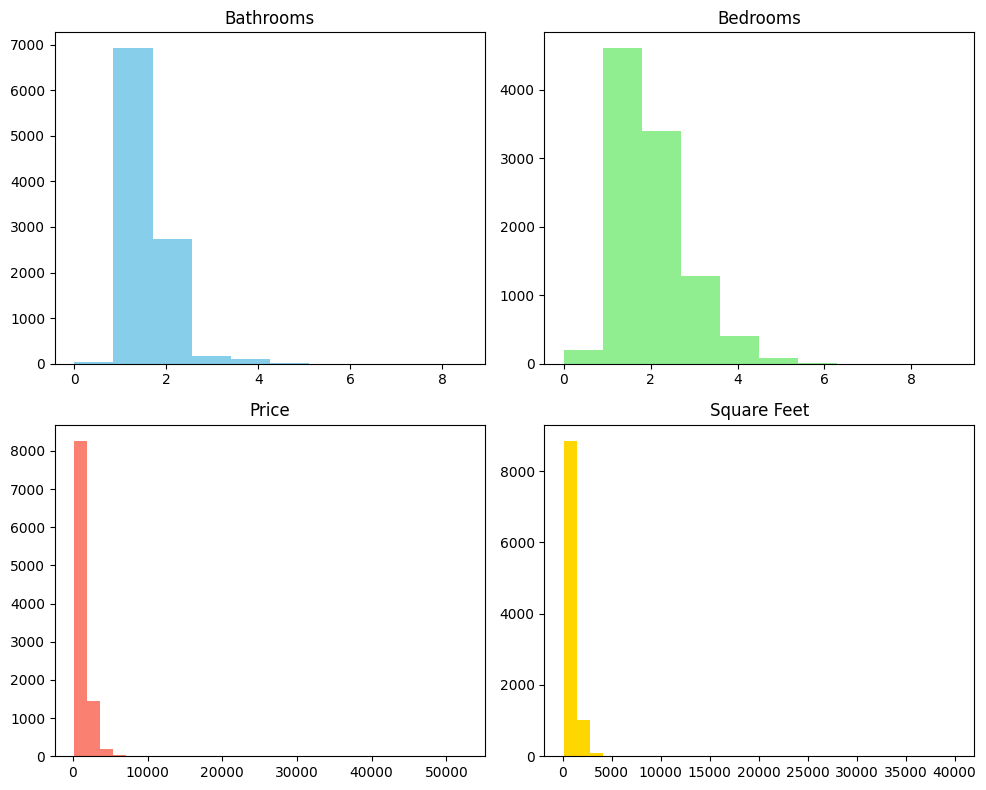

In [9]:
# EDA - Histograms
fig, axes = matplot.subplots(2, 2, figsize=(10, 8))
axes[0, 0].hist(apartment_rent["bathrooms"], bins=10, color="skyblue")
axes[0, 0].set_title("Bathrooms")
axes[0, 1].hist(apartment_rent["bedrooms"], bins=10, color="lightgreen")
axes[0, 1].set_title("Bedrooms")
axes[1, 0].hist(apartment_rent["price"], bins=30, color="salmon")
axes[1, 0].set_title("Price")
axes[1, 1].hist(apartment_rent["square_feet"], bins=30, color="gold")
axes[1, 1].set_title("Square Feet")

matplot.tight_layout()
matplot.show()

In [10]:
# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [12]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

In [14]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_pca)

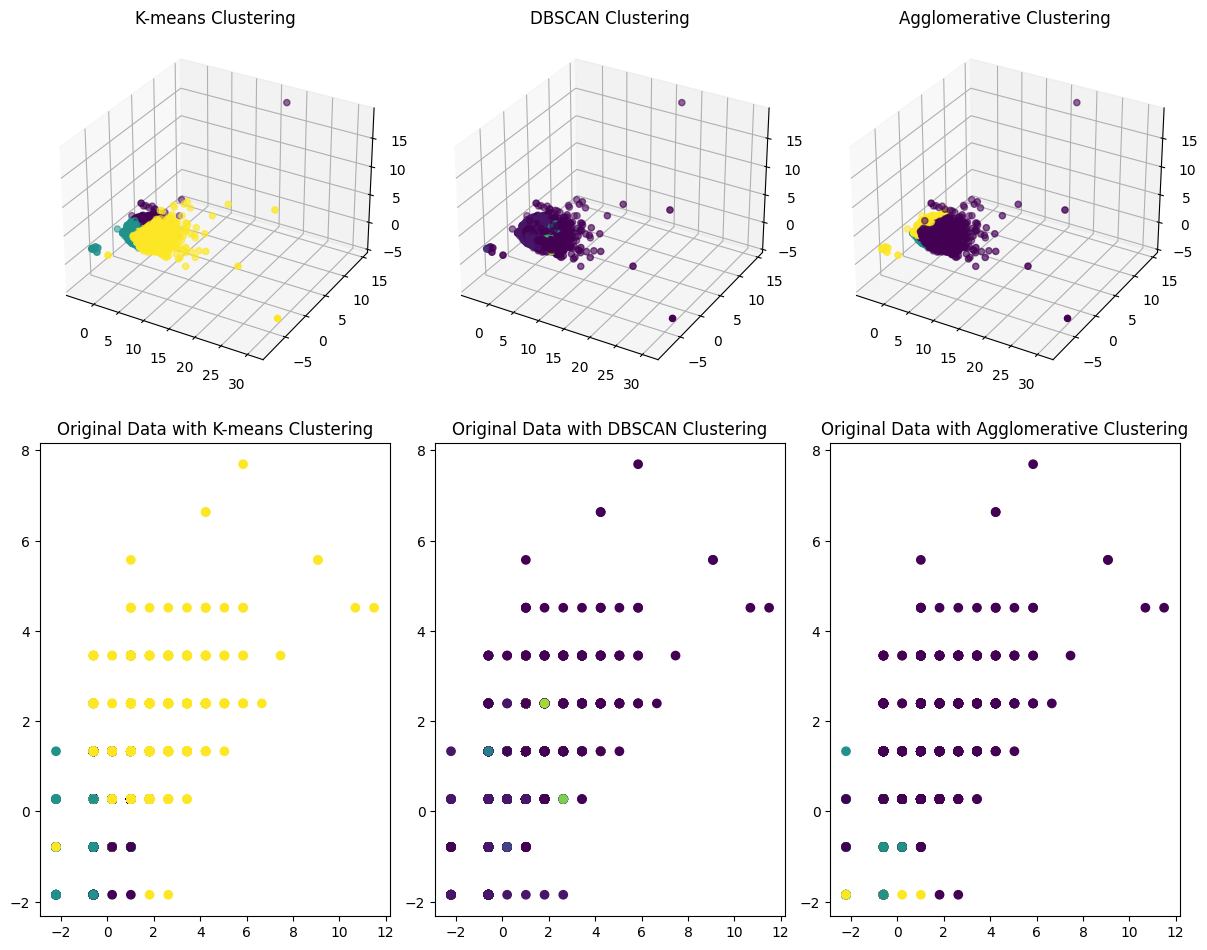

In [15]:
# Visualize clustering results
fig = matplot.figure(figsize=(12, 10))
# Scatter plot with K-means clustering
ax1 = fig.add_subplot(231, projection='3d')
ax1.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=kmeans_labels)
ax1.set_title("K-means Clustering")
# Scatter plot with DBSCAN clustering
ax2 = fig.add_subplot(232, projection='3d')
ax2.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=dbscan_labels)
ax2.set_title("DBSCAN Clustering")
# Scatter plot with Agglomerative Clustering
ax3 = fig.add_subplot(233, projection='3d')
ax3.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=agg_labels)
ax3.set_title("Agglomerative Clustering")
# Scatter plot of original data
ax4 = fig.add_subplot(234)
ax4.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels)
ax4.set_title("Original Data with K-means Clustering")
ax5 = fig.add_subplot(235)
ax5.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels)
ax5.set_title("Original Data with DBSCAN Clustering")
ax6 = fig.add_subplot(236)
ax6.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels)
ax6.set_title("Original Data with Agglomerative Clustering")
matplot.tight_layout()
matplot.show()

In [16]:
# Silhouette score for K-means clustering
kmeans_silhouette_score = silhouette_score(X_scaled, kmeans_labels)
print("K-means Silhouette Score:", kmeans_silhouette_score)

# Calinski-Harabasz score for K-means clustering
kmeans_calinski_score = calinski_harabasz_score(X_scaled, kmeans_labels)
print("K-means Calinski-Harabasz Score:", kmeans_calinski_score)

K-means Silhouette Score: 0.2897361157783979
K-means Calinski-Harabasz Score: 2790.342309026587


In [17]:
# Silhouette score for DBSCAN clustering
dbscan_silhouette_score = silhouette_score(X_scaled, dbscan_labels)
print("DBSCAN Silhouette Score:", dbscan_silhouette_score)

# Calinski-Harabasz score for DBSCAN clustering
dbscan_calinski_score = calinski_harabasz_score(X_scaled, dbscan_labels)
print("DBSCAN Calinski-Harabasz Score:", dbscan_calinski_score)


DBSCAN Silhouette Score: -0.13101256336835312
DBSCAN Calinski-Harabasz Score: 104.60113814681364


In [18]:
# Silhouette score for Agglomerative Clustering
agg_silhouette_score = silhouette_score(X_scaled, agg_labels)
print("Agglomerative Clustering Silhouette Score:", agg_silhouette_score)

# Calinski-Harabasz score for Agglomerative Clustering
agg_calinski_score = calinski_harabasz_score(X_scaled, agg_labels)
print("Agglomerative Clustering Calinski-Harabasz Score:", agg_calinski_score)

Agglomerative Clustering Silhouette Score: 0.23128390208264746
Agglomerative Clustering Calinski-Harabasz Score: 2608.5564537354617
